Question 1: Install and load the latest versions of TensorFlow and Keras. Print their versions.

Answer:

%pip install tensorflow keras

In [1]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [2]:
import keras
keras.__version__

'2.15.0'

Questionn 2 : Load the Wine Quality dataset and explore its dimensions.

Link : https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [4]:
# Read the dataset
import pandas as pd
df = pd.read_csv('wine.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
# Descriptive Statistics Numeric variables
df.describe(exclude='object').T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000

In [7]:
df.describe(include='object').T

count unique   top freq
quality  1599      2  good  855

<Axes: title={'center': 'Wine Quality CountPlot'}, xlabel='quality'>

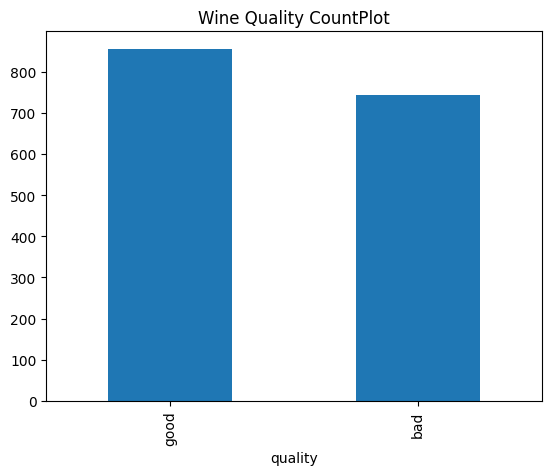

In [8]:
# Univariate analysis categorical feature
df['quality'].value_counts().plot(kind='bar',title='Wine Quality CountPlot')

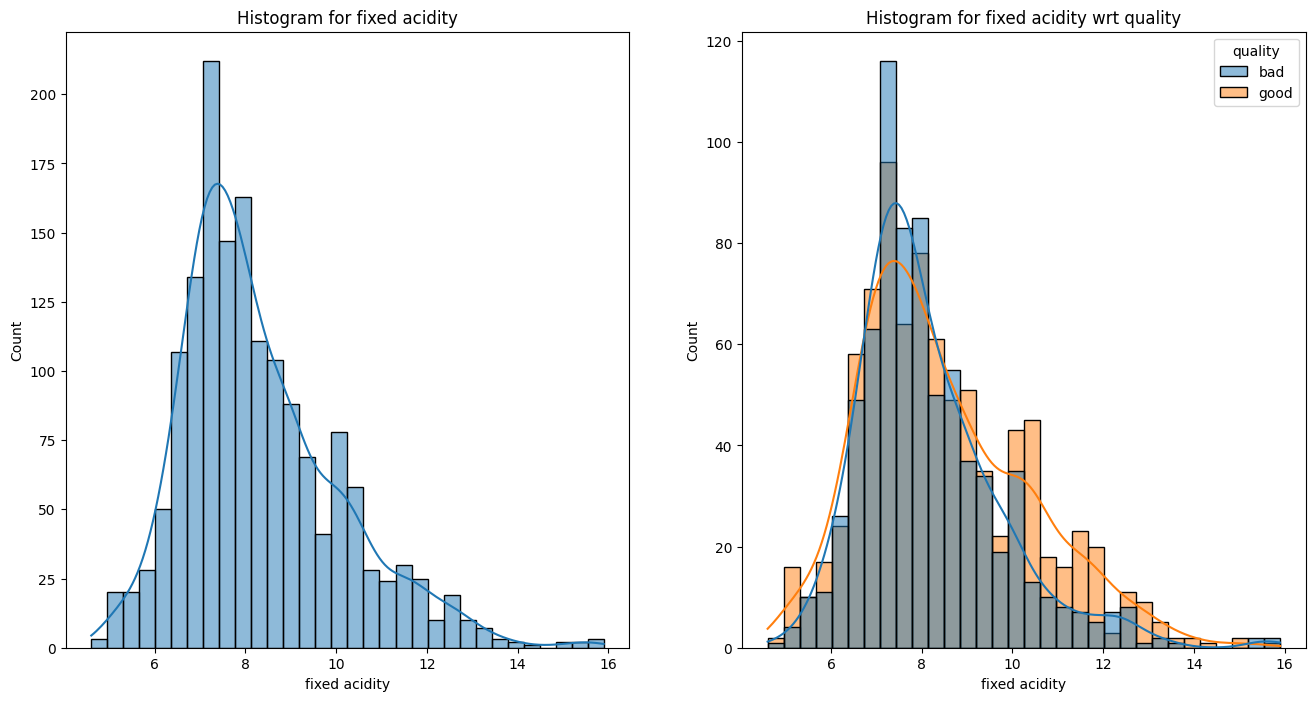

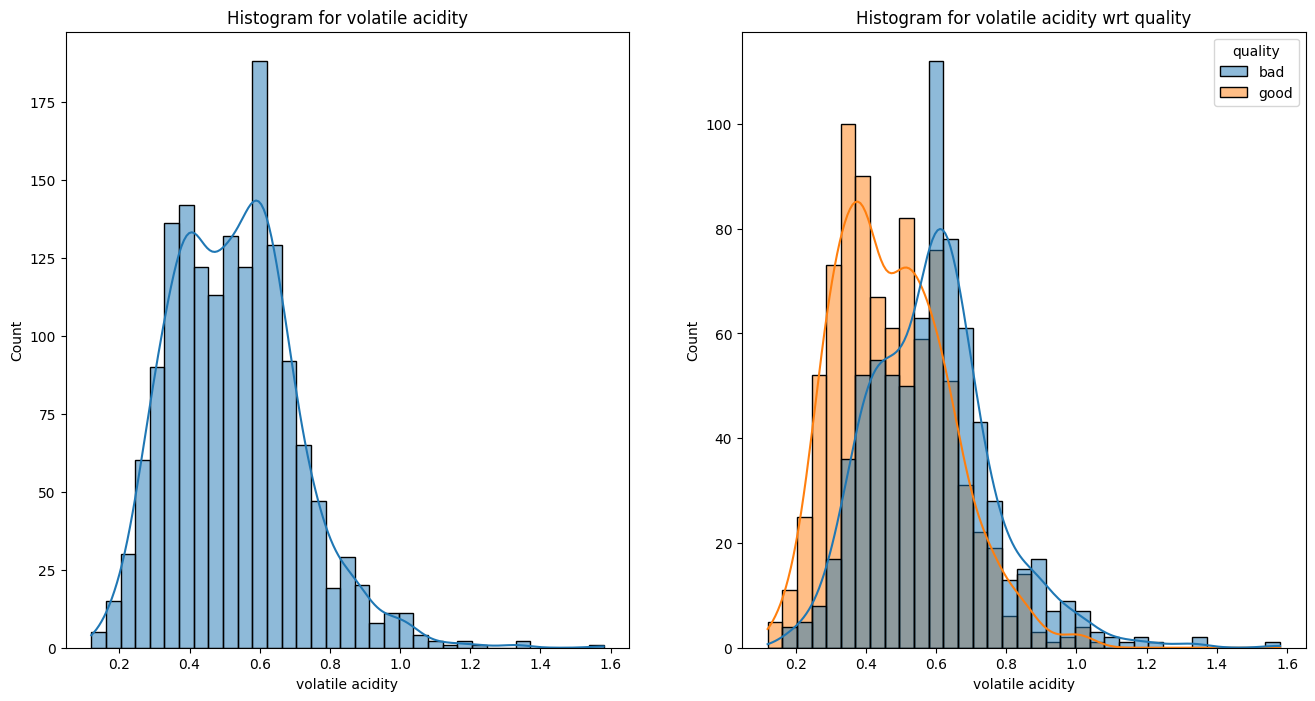

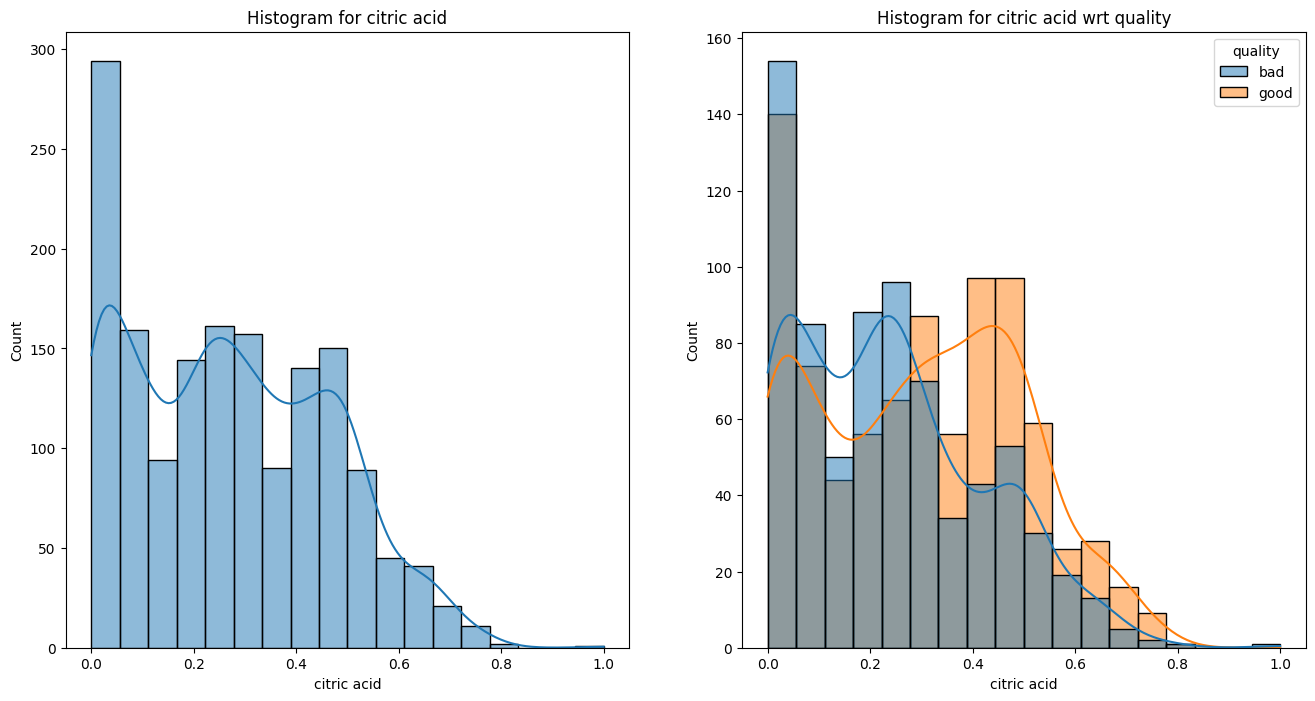

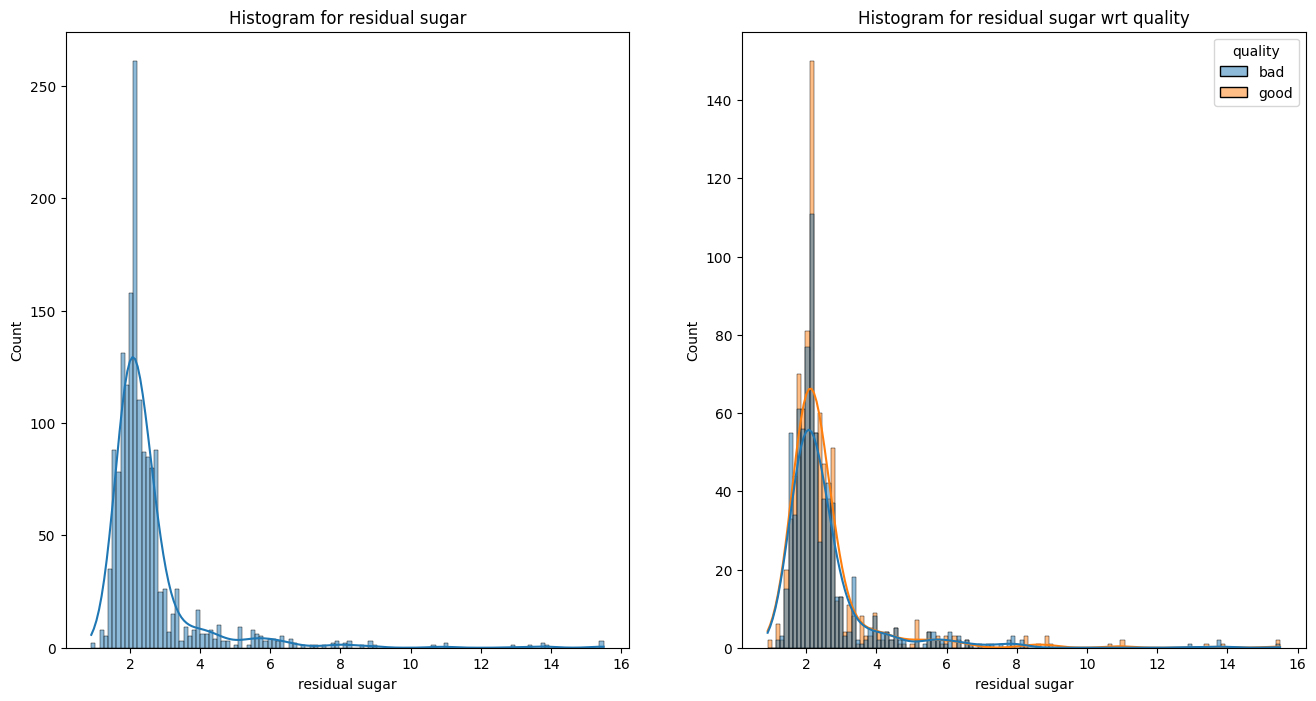

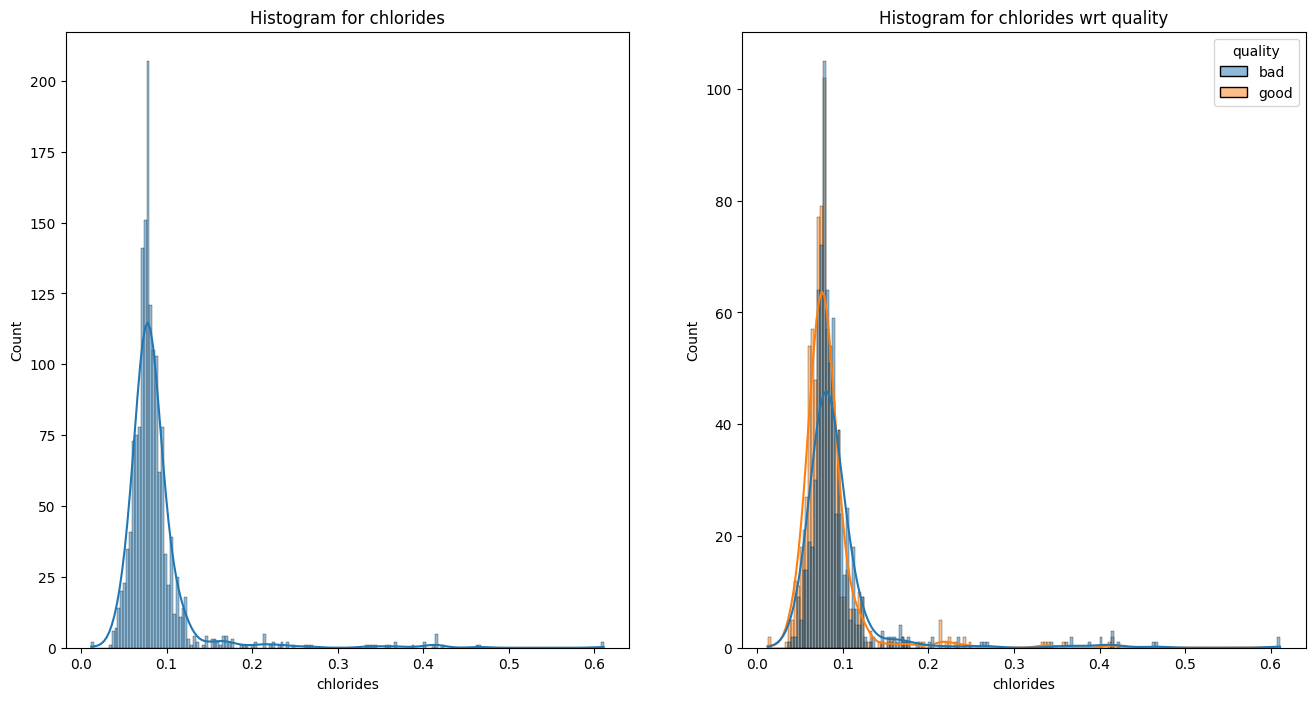

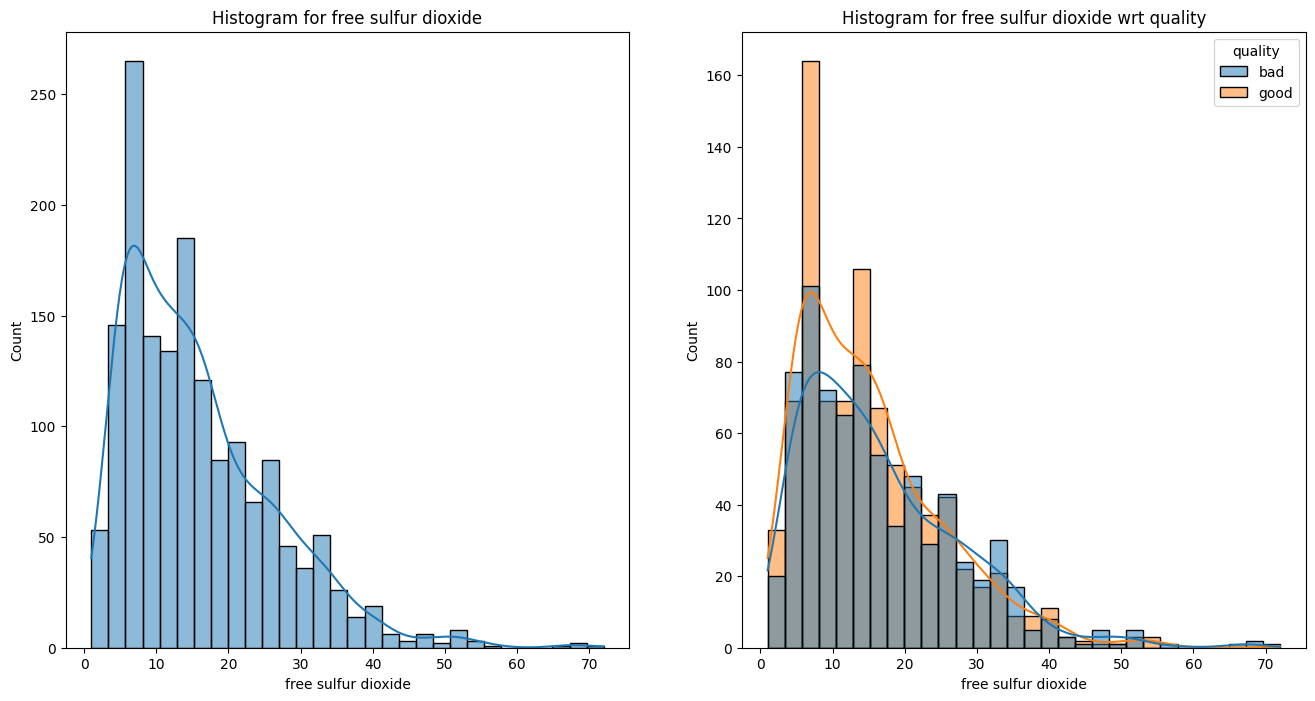

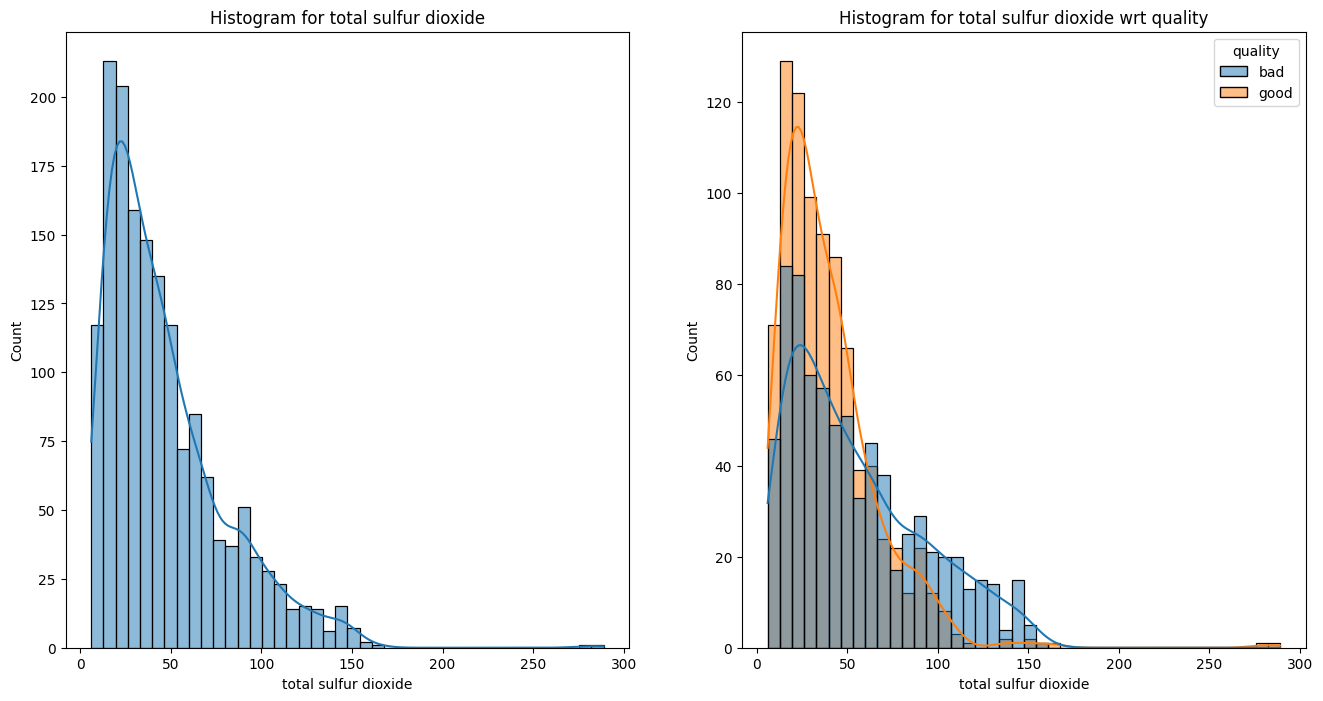

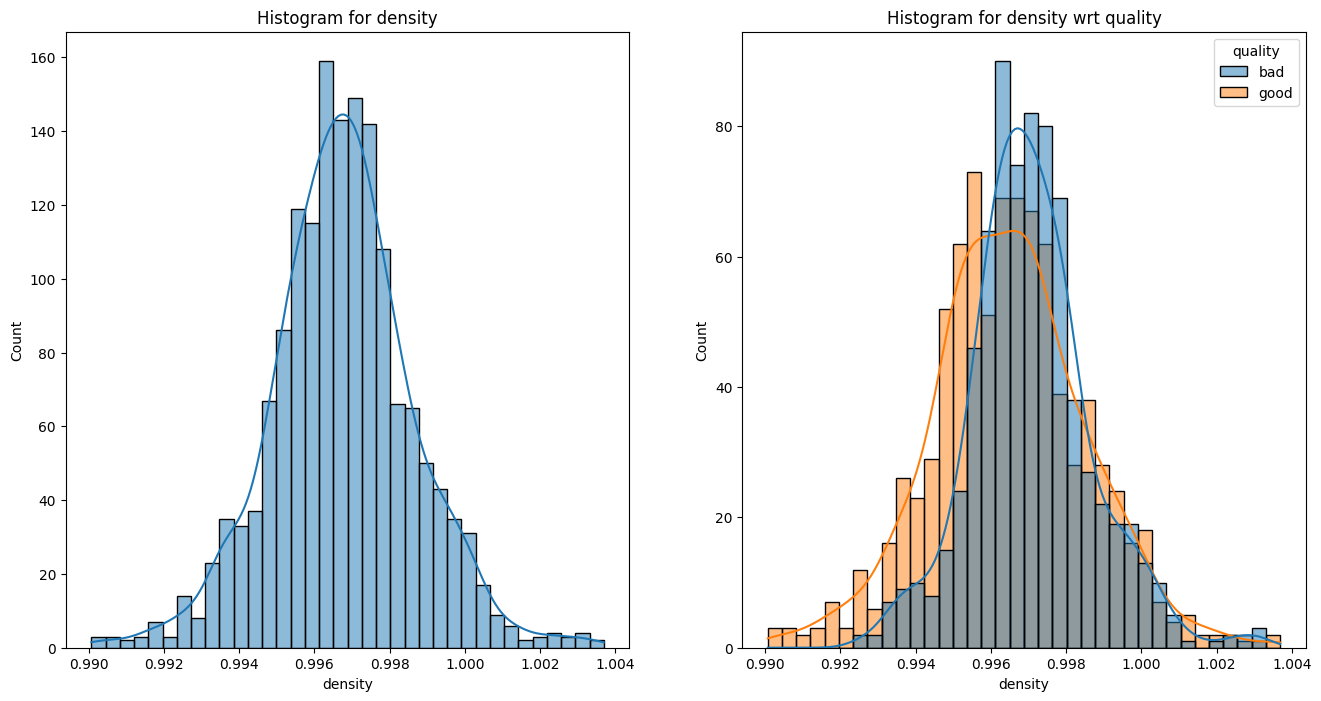

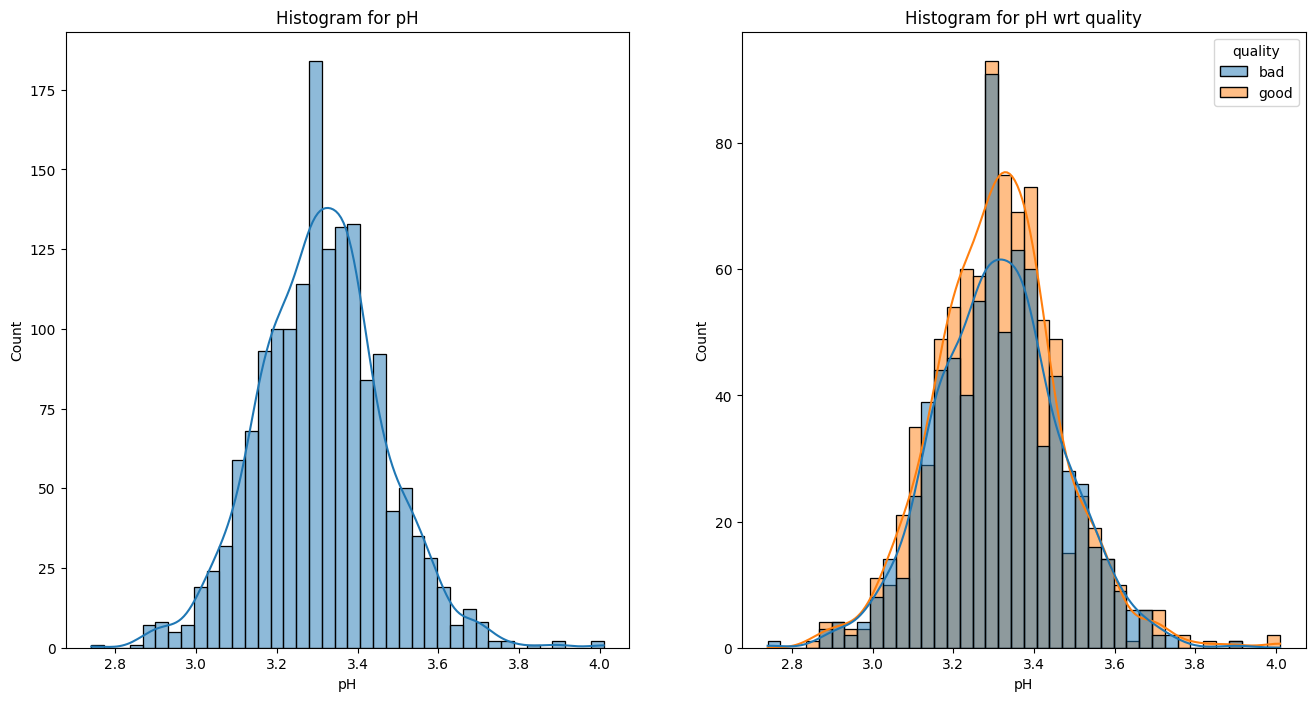

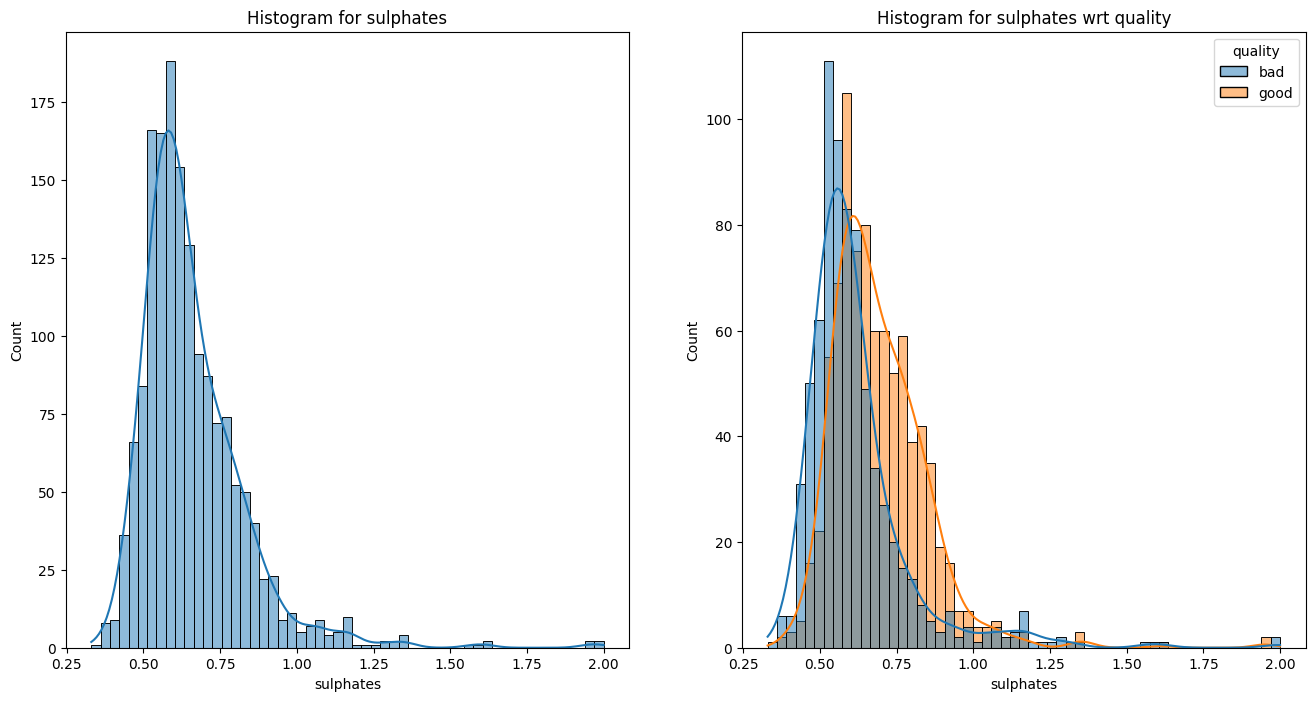

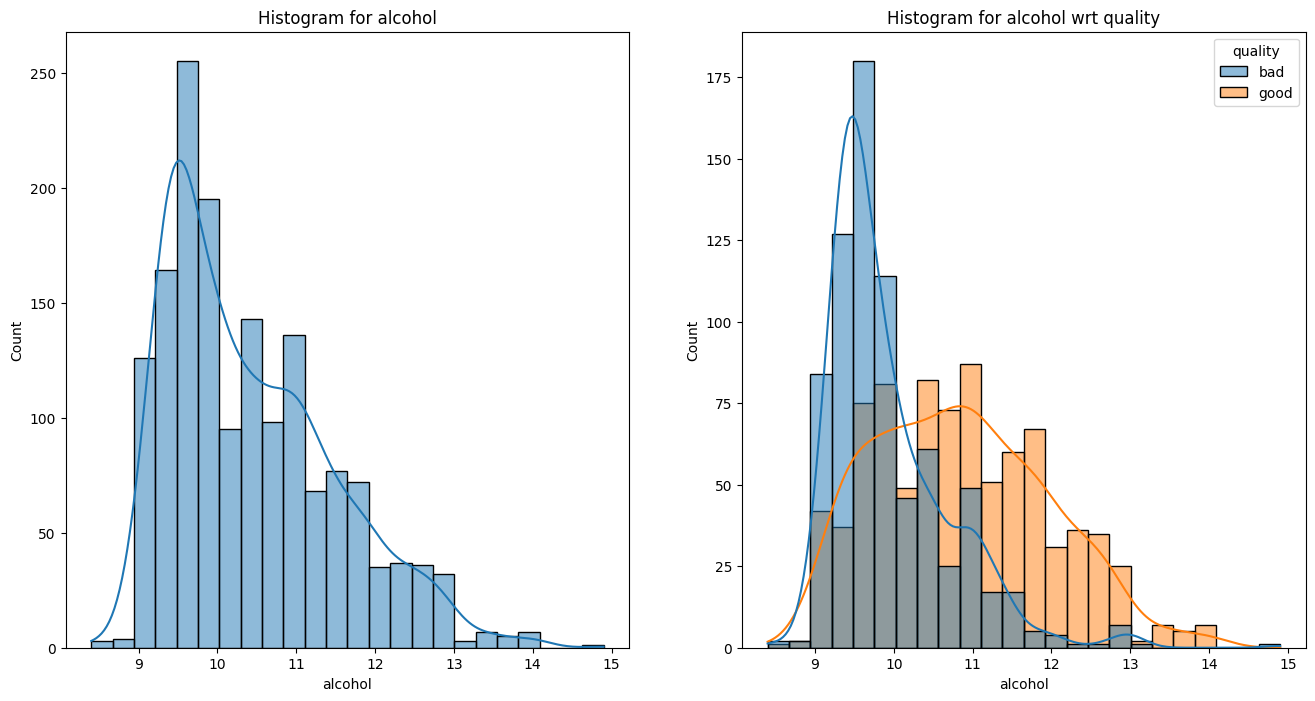

In [9]:
# Histogram for continous features
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    if df[i].dtype!='object':
        plt.figure(figsize=(16,8))
        plt.subplot(1,2,1)
        sns.histplot(data=df,x=i,kde=True)
        plt.title(f'Histogram for {i}')

        plt.subplot(1,2,2)
        sns.histplot(data=df,x=i,hue='quality',kde=True)
        plt.title(f'Histogram for {i} wrt quality')

        plt.show()

In [10]:
# Correlation heatmap
df.corr(numeric_only=True)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   

                       alcohol  
fixed acidity        -0.061668  
volatile acidity     -0.202288  
citric acid           0.109903  
residual sugar        0.042075  
chlorides            -0.221141  
free sulfur dioxide  -0.069408  
total sulfur dioxide -0.205654  
density              -0.496180  
pH                    0.205633  
sulphates             0.093595  
alcohol               1.000000

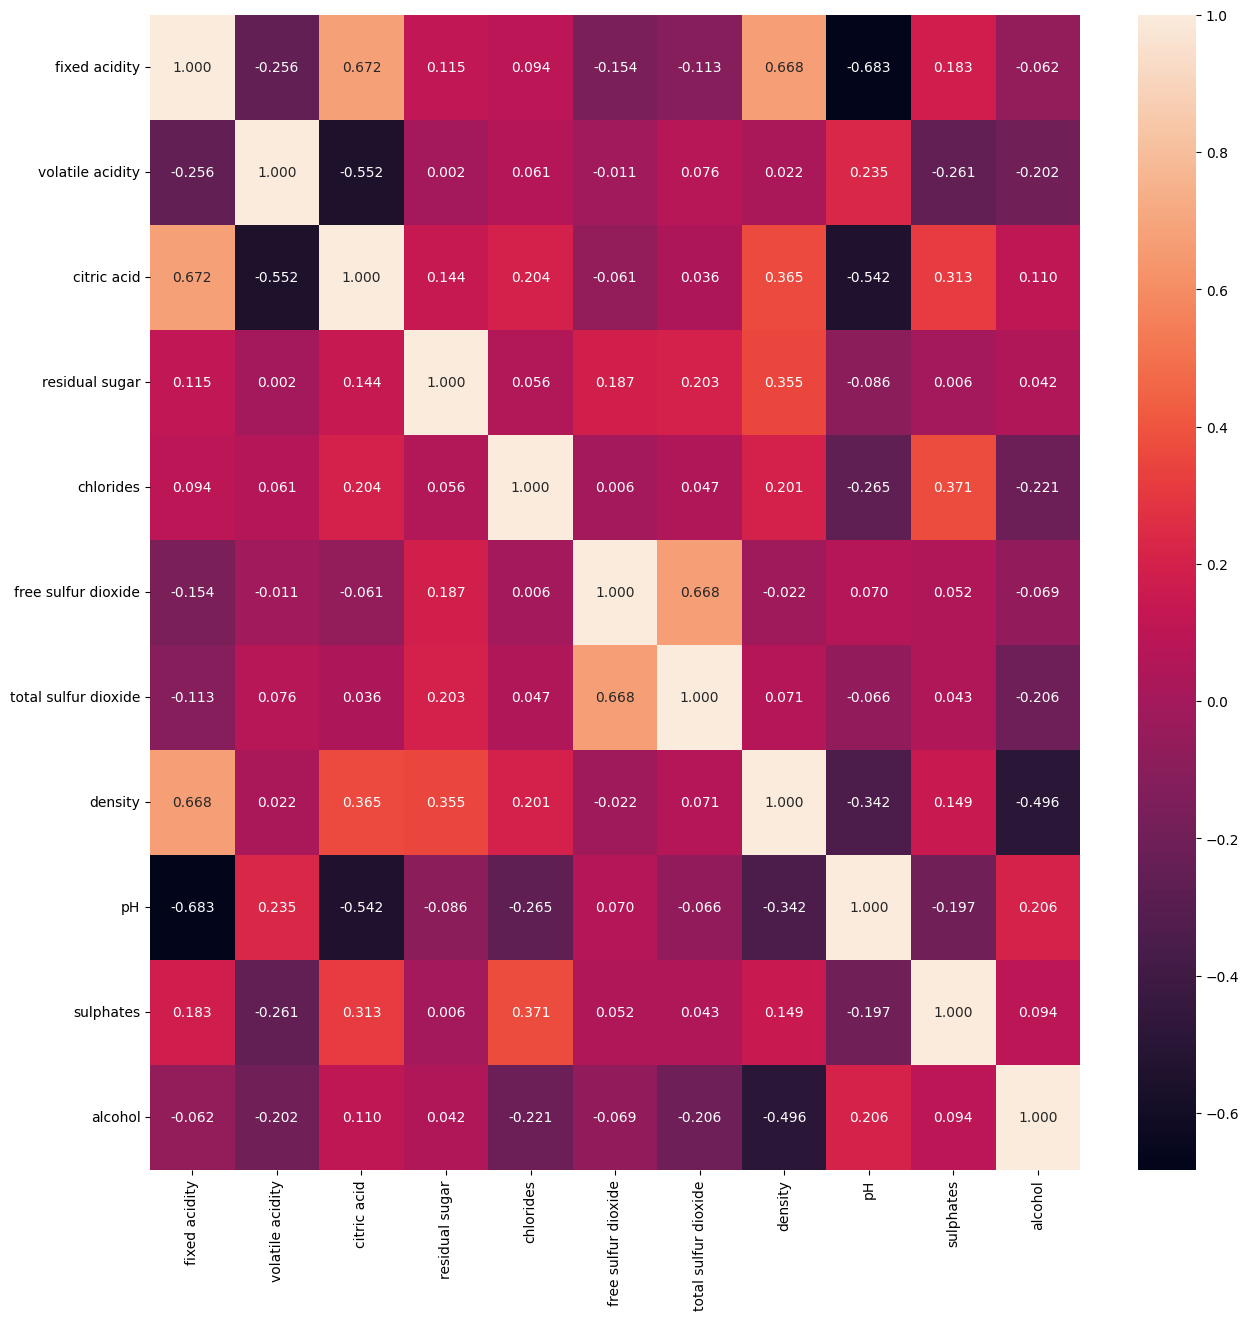

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.3f')
plt.show()

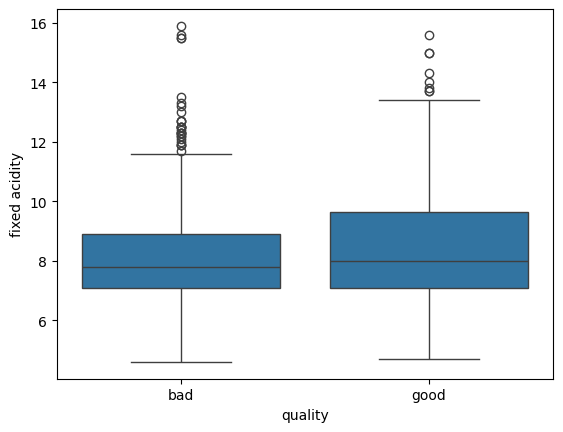

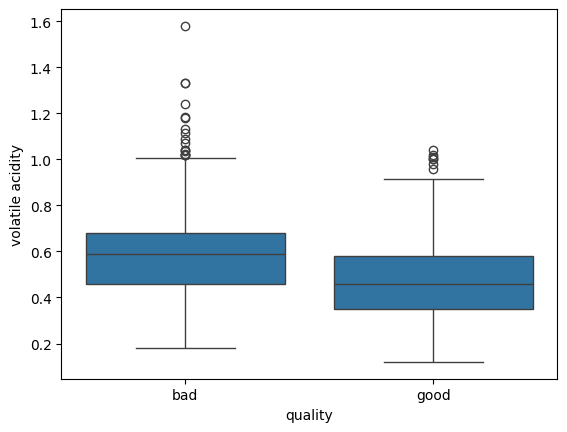

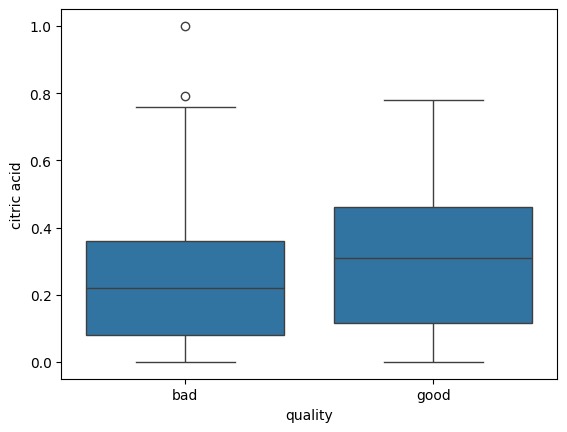

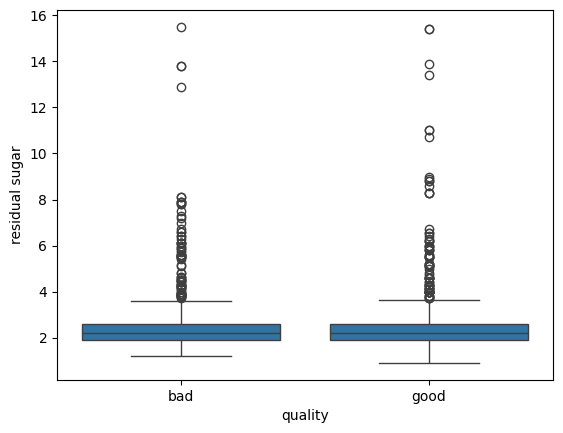

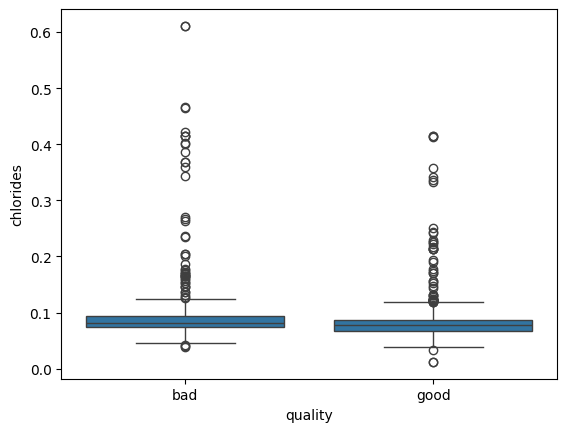

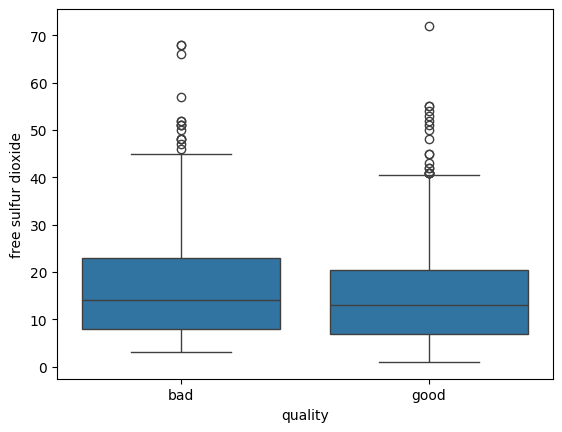

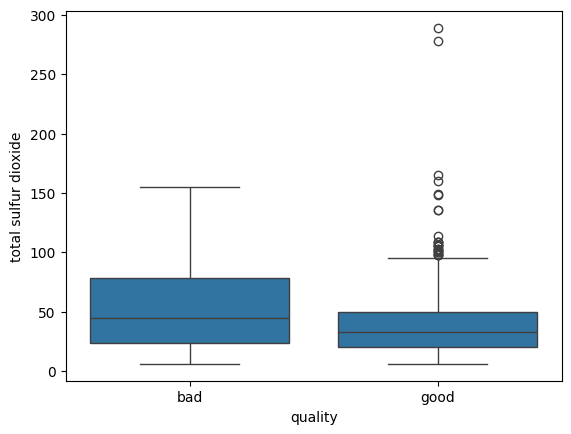

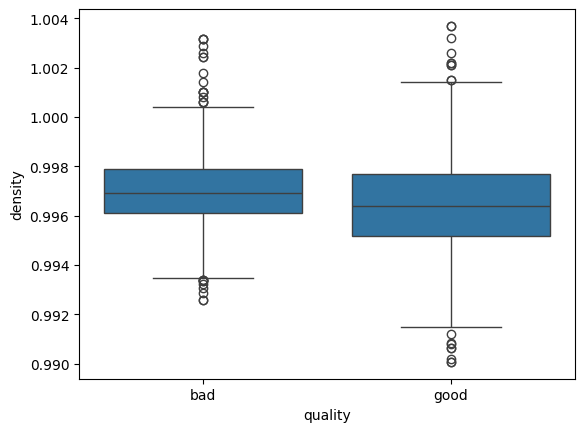

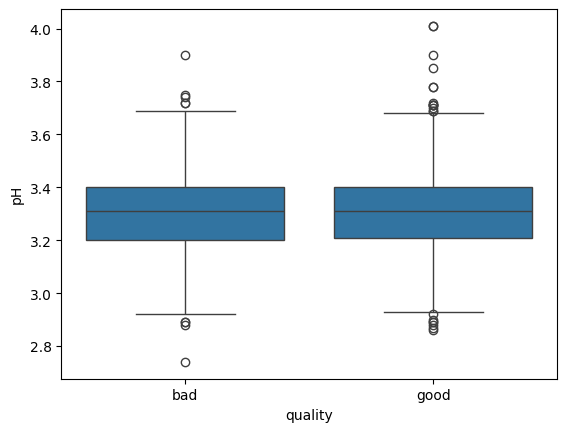

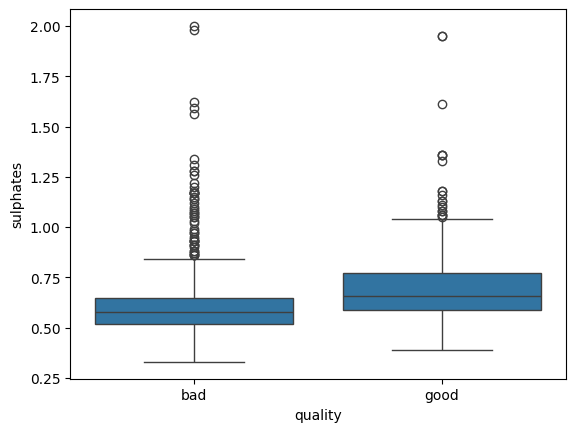

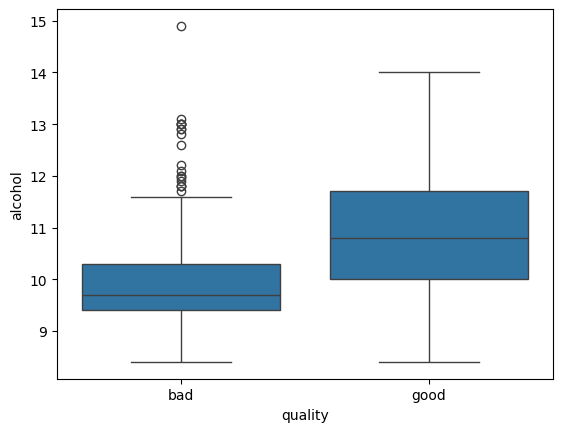

In [12]:
# Box Plot wrt Wine Quality
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(data=df,x='quality',y=i)
        plt.show()

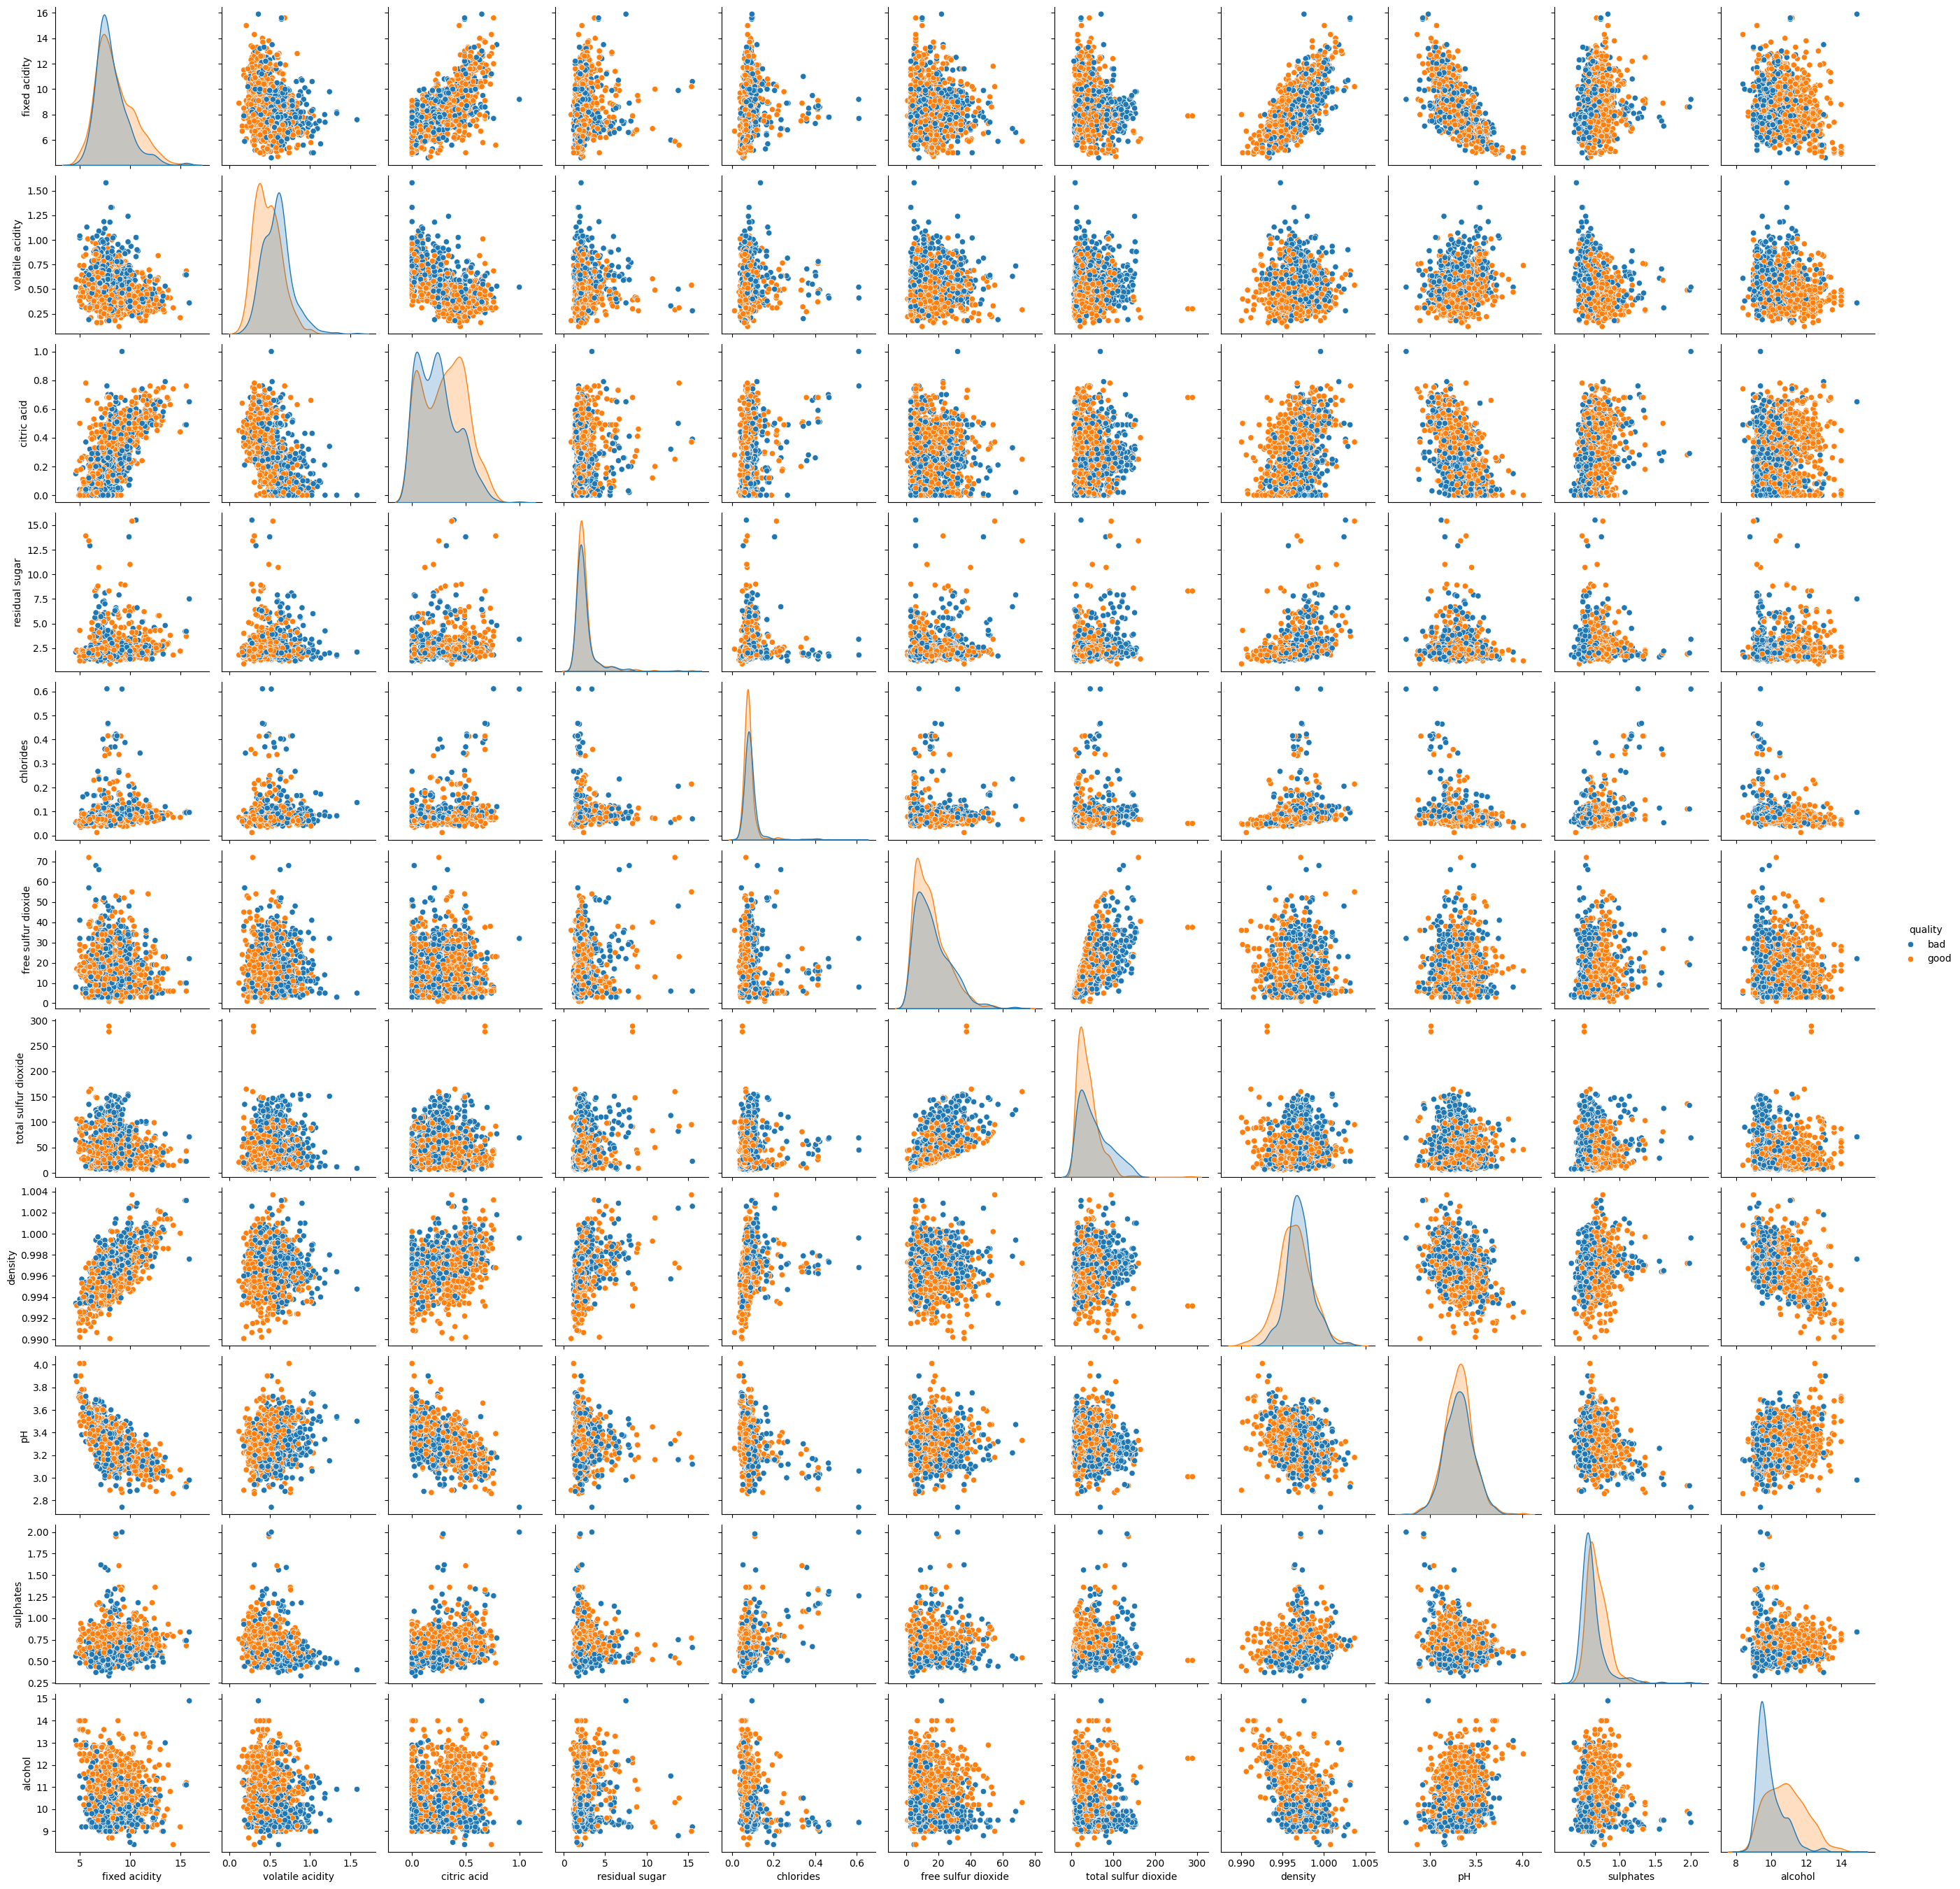

In [13]:
# Multivariate Analysis
sns.pairplot(data=df,hue='quality')

Q3: Check for null values, identify categorical variables, and encode them.

In [14]:
# Checking missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Categorical Features
df.columns[df.dtypes=='object']

Index(['quality'], dtype='object')

In [16]:
# Label Encoding the quality column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

In [17]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

In [18]:
# Checking duplicated values
df.duplicated().sum()

240

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.shape

(1359, 12)

Q4: Separate the features and target variables from the dataframe.

In [21]:
X = df.drop(labels=['quality'],axis=1)
Y = df[['quality']]

In [22]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
5      9.4

In [23]:
Y.head()

quality
0        0
1        0
2        0
3        1
5        0

Q5 : Perform a train-test split and divide the data into training, validation, and test datasets.

Solution: Important : There is no need of seperating validation data as in keras library we can give a parameter called as validation_split

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
xtrain.shape

(1087, 11)

In [26]:
xtest.shape

(272, 11)

Q5 : Perform scaling on the dataset.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scl = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest_scl = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [28]:
xtest_scl.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.343944          0.517338    -1.194658        0.933678  -0.106593   
1      -0.054125          0.601441    -0.887420       -0.311698  -0.316290   
2       0.061803         -0.884392     0.802390       -0.165183  -0.506923   
3       0.931263         -0.211562     1.570486        0.713906   0.084040   
4      -1.155440          2.760106    -1.399484       -0.384955  -0.125657   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.896271             -0.055555  0.591961  0.200156  -0.746237   
1             0.896271              0.395101 -0.170479 -0.128400   0.519851   
2            -0.362070             -0.836691 -0.642977 -0.916933   0.865147   
3            -0.652457             -0.115642  1.987978 -0.128400  -0.458489   
4             0.121907             -0.686473 -1.249707  1.842934  -0.631138   

    alcohol  
0 -0.857565  
1  0.425831  
2  0.700844  
3 -1.315921  
4  0.700844

In [29]:
xtest_scl.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.343944          0.517338    -1.194658        0.933678  -0.106593   
1      -0.054125          0.601441    -0.887420       -0.311698  -0.316290   
2       0.061803         -0.884392     0.802390       -0.165183  -0.506923   
3       0.931263         -0.211562     1.570486        0.713906   0.084040   
4      -1.155440          2.760106    -1.399484       -0.384955  -0.125657   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.896271             -0.055555  0.591961  0.200156  -0.746237   
1             0.896271              0.395101 -0.170479 -0.128400   0.519851   
2            -0.362070             -0.836691 -0.642977 -0.916933   0.865147   
3            -0.652457             -0.115642  1.987978 -0.128400  -0.458489   
4             0.121907             -0.686473 -1.249707  1.842934  -0.631138   

    alcohol  
0 -0.857565  
1  0.425831  
2  0.700844  
3 -1.315921  
4  0.700844

Q7: Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [30]:
from keras.layers import Dense, Dropout, BatchNormalization

In [31]:
layer1 = Dense(128,input_dim=xtrain.shape[1],activation='relu')
layer2 = BatchNormalization()
layer3 = Dropout(0.2)

layer4 = Dense(64,activation='relu')
layer5 = BatchNormalization()
layer6 = Dropout(0.2)

output = Dense(1,activation='sigmoid')

Q8: Create a Sequential model and add all the layers to it.

In [32]:
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.add(output)

Question 9 : Implement a TensorBoard callback to visualize and monitor the model's training process.

In [34]:
from keras.callbacks import TensorBoard

log_dir = "logs/"  # Choose a directory where TensorBoard will save logs and events

# Create the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [35]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

Q11: Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [36]:
from keras.callbacks import ModelCheckpoint
# Define the checkpoint path where the best model will be saved
checkpoint_path = "model/best_model.h5"

# Create the ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',  # Choose the metric to monitor for saving the best model
    mode='min',          # Set 'max' if the metric should be maximized (e.g., accuracy)
    save_best_only=True, # Only save the best model (True: overwrite the previous best model)
    verbose=1            # Verbosity mode. 0: silent, 1: progress bar, 2: one line per epoch.
)

Q12. Print the model summary.

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

Q13: Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [38]:
loss = 'binary_crossentropy'

In [39]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

In [40]:
metrics = ['accuracy']

Q14: Compile the model with the specified loss function, optimizer, and metrics.

In [41]:
model.compile(loss=loss, optimizer=optimizer ,metrics=metrics)

Q15: Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [42]:
from warnings import filterwarnings
filterwarnings('ignore')

In [43]:
hist = model.fit(xtrain_scl, ytrain, validation_split=0.2, epochs=500, batch_size=64,
                 callbacks=[tensorboard_callback, early_stop, model_checkpoint_callback])

Epoch 1/500
12/14 [========================>.....] - ETA: 0s - loss: 0.9066 - accuracy: 0.5482
Epoch 1: val_loss improved from inf to 0.69211, saving model to model/best_model.h5
14/14 [==============================] - 5s 115ms/step - loss: 0.8856 - accuracy: 0.5650 - val_loss: 0.6921 - val_accuracy: 0.5596
Epoch 2/500
 1/14 [=>............................] - ETA: 0s - loss: 0.8971 - accuracy: 0.5938
Epoch 2: val_loss improved from 0.69211 to 0.67628, saving model to model/best_model.h5
14/14 [==============================] - 0s 16ms/step - loss: 0.7940 - accuracy: 0.6122 - val_loss: 0.6763 - val_accuracy: 0.5734
Epoch 3/500
14/14 [==============================] - ETA: 0s - loss: 0.7921 - accuracy: 0.5938
Epoch 3: val_loss improved from 0.67628 to 0.66297, saving model to model/best_model.h5
14/14 [==============================] - 0s 18ms/step - loss: 0.7921 - accuracy: 0.5938 - val_loss: 0.6630 - val_accuracy: 0.6376
Epoch 4/500
 1/14 [=>............................] - ETA: 0s - l

Q16: Get the model's parameters.

In [44]:
model.get_build_config()

{'input_shape': (None, 11)}

In [45]:
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 11),
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'inp

In [46]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.57073563>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.7477064>}

Q17. Store the model's training history as a Pandas DataFrame.

In [47]:
dct = {'loss':hist.history['loss'],
       'val_loss':hist.history['val_loss'],
       'accuracy':hist.history['accuracy'],
       'val_accuracy':hist.history['val_accuracy']}

In [48]:
df_history = pd.DataFrame(dct)
df_history

loss  val_loss  accuracy  val_accuracy
0   0.885554  0.692106  0.565017      0.559633
1   0.794037  0.676275  0.612198      0.573394
2   0.792069  0.662973  0.593786      0.637615
3   0.713065  0.652568  0.649022      0.683486
4   0.678944  0.644828  0.652474      0.688073
5   0.698939  0.638058  0.667434      0.683486
6   0.685080  0.631321  0.674338      0.688073
7   0.675480  0.623914  0.675489      0.692661
8   0.656177  0.617336  0.659379      0.688073
9   0.637339  0.611753  0.672037      0.697248
10  0.636233  0.606151  0.675489      0.706422
11  0.608128  0.600170  0.701956      0.706422
12  0.586158  0.595360  0.710011      0.701835
13  0.609913  0.590919  0.693901      0.706422
14  0.611305  0.586369  0.703107      0.711009
15  0.577736  0.582826  0.722670      0.711009
16  0.590939  0.579424  0.721519      0.715596
17  0.589774  0.576282  0.715765      0.720183
18  0.579188  0.574695  0.720368      0.715596
19  0.609581  0.572933  0.697353      0.720183
20  0.577205  0.571461  0.721519      0.729358
21  0.566000  0.570495  0.733026      0.733945
22  0.599021  0.569531  0.708861      0.738532
23  0.547258  0.569770  0.726122      0.743119
24  0.585364  0.570118  0.730725      0.747706
25  0.584010  0.571042  0.700806      0.752294
26  0.542028  0.570693  0.726122      0.756881
27  0.553968  0.570419  0.739931      0.752294
28  0.555053  0.570374  0.734177      0.756881
29  0.559243  0.570751  0.730725      0.761468
30  0.550565  0.570691  0.738780      0.761468
31  0.561934  0.570757  0.742232      0.752294
32  0.543576  0.570736  0.736479      0.747706

In [49]:
df_history.to_csv('NeuralNetHistory.csv')

Q18. Plot the model's training history.

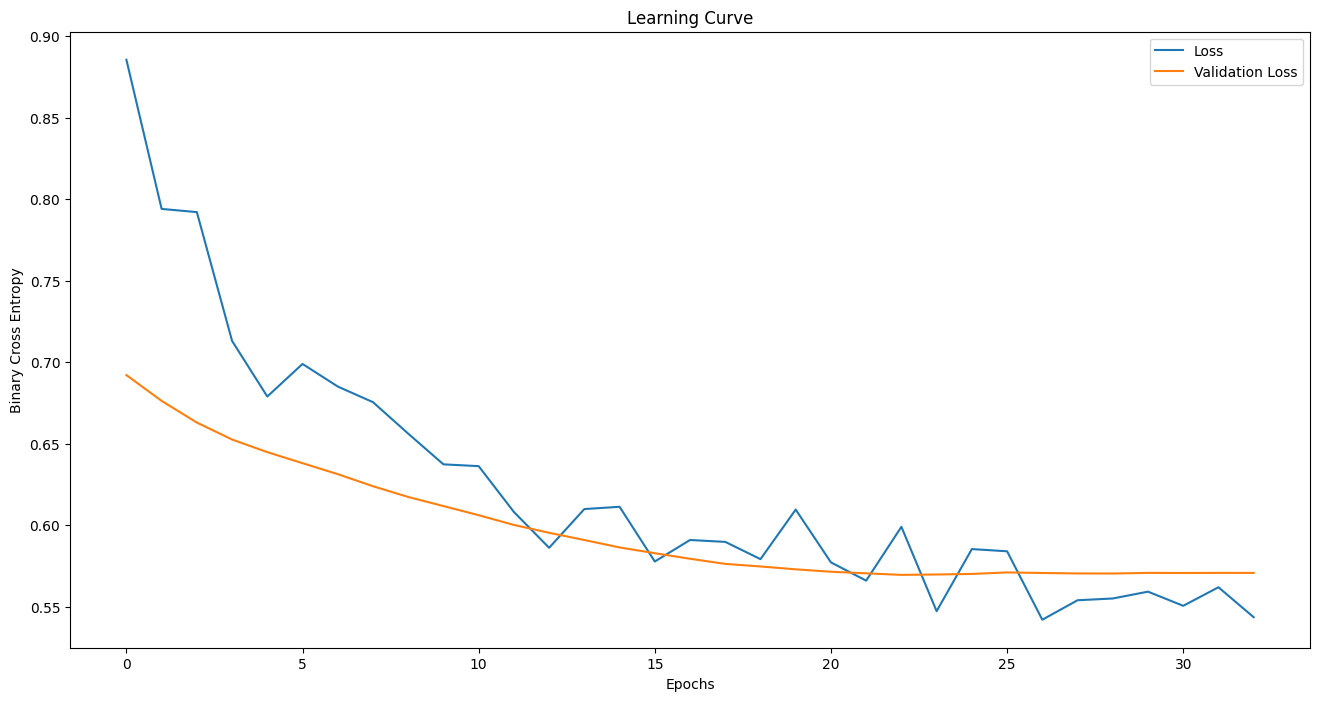

In [50]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

Q19: Evaluate the model's performance using the test data.

In [51]:
# Model Accuracy
ts_loss, ts_acc = model.evaluate(xtest_scl,ytest)
print(f'Testing Binrary Cross Entropy Loss : {ts_loss:.4f}')
print(f'Testing Accuracy : {ts_acc:.4f}')

9/9 [==============================] - 0s 5ms/step - loss: 0.4941 - accuracy: 0.7574
Testing Binrary Cross Entropy Loss : 0.4941
Testing Accuracy : 0.7574


In [52]:
# Predicting test data
ts_prob = model.predict(xtest_scl)
ts_prob[0:5]

9/9 [==============================] - 0s 4ms/step


array([[0.33181494],
       [0.73323727],
       [0.8787858 ],
       [0.3182161 ],
       [0.56408745]], dtype=float32)

In [53]:
# Predict with threshold value of 0.5
thr = 0.5
ypred_ts = []
for i in ts_prob:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [54]:
ypred_ts[0:5]

[0, 1, 1, 0, 1]

In [55]:
ytest.head()

quality
55          0
1291        1
1544        1
593         0
1261        0

In [56]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       135
           1       0.76      0.75      0.76       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



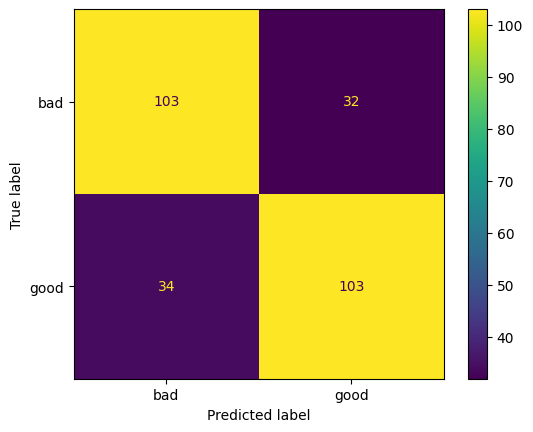

In [57]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=['bad','good'])
cfd.plot()

### Above model is a good generalized model